In [2]:
import h5py
import numpy as np

# Define variables
file_name = 'temperature'
file_paths = [f'{file_name}.h5', f'flow_steady_state/{file_name}.h5', f'partial_equil/{file_name}.h5']
grid_cells = 8
domain_size = 1500
sig = 1000
F = 850
x = np.linspace(0, domain_size, grid_cells)  # x ranges from 0 to 1500 in steps of 10

# Compute the right-hand side of the Gaussian
y = F * np.exp(-(x) ** 2. / (2. * sig ** 2.))

# Calculate grid spacing
grid_spacing = domain_size / grid_cells

# Path to save the HDF5 file
# Create the new HDF5 file
for file_path in file_paths:
    with h5py.File(file_path, 'w') as f:
        # Create the group 'energy_flux'
        group = f.create_group(file_name)
        
        # Add the attributes to the group
        group.attrs['Cell Centered'] = np.array([True])
        group.attrs['Dimension'] = np.array([b'X'], dtype='|S1')
        group.attrs['Discretization'] = np.array([grid_spacing])
        group.attrs['Max Buffer Size'] = np.array([2])
        #group.attrs['Origin'] = np.array([-1.0])
        group.attrs['Origin'] = np.array([0.0])
        group.attrs['Space Interpolation Method'] = np.string_('LINEAR')
        
        # Create the dataset 'Data' within the group with shape (32,) and dtype 'float64'
        dataset = group.create_dataset('Data', data=y, dtype='float64')

    print(f"File '{file_path}' has been created with the specified structure and attributes.")


File 'temperature.h5' has been created with the specified structure and attributes.
File 'flow_steady_state/temperature.h5' has been created with the specified structure and attributes.
File 'partial_equil/temperature.h5' has been created with the specified structure and attributes.


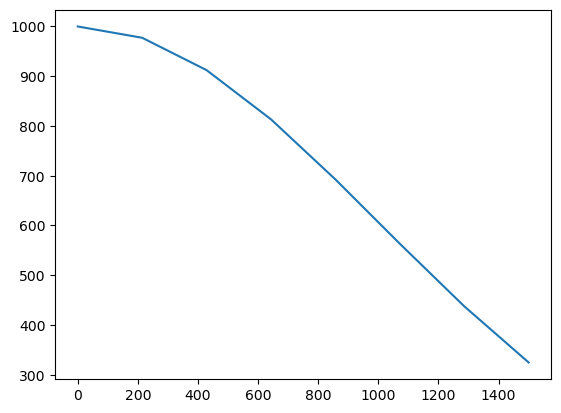

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y)